In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import seaborn as sns

In [6]:
data_set = pd.read_csv("IMDB Dataset.csv")

In [7]:
data_set.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
data_set.shape

(50000, 2)

In [9]:
len(data_set['review'][0])

1761

In [10]:
len(data_set['review'][1])

998

In [11]:
data_train = data_set.iloc[0:25000,:]
data_test = data_set.iloc[25000:,:]

In [12]:
data_train.shape

(25000, 2)

In [13]:
data_test.shape

(25000, 2)

In [14]:
data_train.groupby('sentiment').count()/25000

,review
sentiment,
negative,0.50104
positive,0.49896


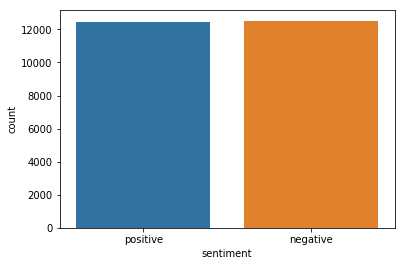

In [15]:
sns.countplot(data_train['sentiment'])

In [16]:
##### Limpieza de datos #####

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data_train['review'])

In [18]:
#sequences = tokenizer.texts_to_sequences(data_set['review'])
X_train = tokenizer.texts_to_sequences(data_train['review'])
X_test = tokenizer.texts_to_sequences(data_test['review'])

In [19]:
X_train

[[27,
  4,
  1,
  77,
  2019,
  45,
  1006,
  12,
  100,
  147,
  39,
  318,
  3335,
  425,
  450,
  26,
  3076,
  33,
  23,
  197,
  14,
  11,
  6,
  602,
  48,
  596,
  15,
  69,
  7,
  7,
  1,
  87,
  148,
  12,
  3387,
  69,
  41,
  3335,
  13,
  92,
  5350,
  2,
  133,
  4,
  543,
  60,
  271,
  8,
  197,
  36,
  1,
  649,
  139,
  1686,
  69,
  11,
  6,
  21,
  3,
  118,
  16,
  1,
  8001,
  2225,
  38,
  11,
  118,
  2518,
  54,
  5451,
  15,
  5151,
  5,
  1345,
  383,
  38,
  543,
  92,
  6,
  3879,
  8,
  1,
  354,
  346,
  4,
  1,
  649,
  7,
  7,
  9,
  6,
  432,
  3335,
  14,
  12,
  6,
  1,
  356,
  5,
  1,
  5769,
  2713,
  1178,
  9,
  2754,
  1405,
  20,
  525,
  32,
  4755,
  2678,
  4,
  1,
  1236,
  119,
  29,
  1,
  6968,
  25,
  3090,
  2,
  385,
  34,
  6,
  21,
  316,
  20,
  1,
  4476,
  7279,
  525,
  6,
  350,
  5,
  105,
  7179,
  4438,
  8002,
  2289,
  2,
  50,
  34,
  326,
  8151,
  6618,
  2,
  9654,
  23,
  110,
  236,
  241,
  7,
  7,
  10,
  58,
  132

In [20]:
X_train = pad_sequences(X_train, maxlen=500)
X_test = pad_sequences(X_test, maxlen=500)

In [21]:
len(np.unique(X_train))

10000

In [22]:
y_train = data_train['sentiment'].map({'positive':1, 'negative':0 })
y_test = data_test['sentiment'].map({'positive':1, 'negative':0 })

In [23]:
##### MODELO #####

model = keras.models.Sequential([
                                 keras.layers.Embedding(input_dim=10000 , output_dim=32, input_length=500),
                                 keras.layers.LSTM(20),
                                 keras.layers.Dense(1, activation='sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 20)                4240      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 324,261
Trainable params: 324,261
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [26]:
##### Entrenando #####

model.fit(X_train,y_train, epochs=5, batch_size=512, validation_data=(X_test,y_test))

Train on 25000 samples, validate on 25000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
25000/25000 [==============================] - 56s 2ms/sample - loss: 0.6798 - acc: 0.6214 - val_loss: 0.6150 - val_acc: 0.7468
Epoch 2/5
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.4750 - acc: 0.8110 - val_loss: 0.3903 - val_acc: 0.8468
Epoch 3/5
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.3183 - acc: 0.8799 - val_loss: 0.3438 - val_acc: 0.8554
Epoch 4/5
25000/25000 [==============================] - 55s 2ms/sample - loss: 0.2414 - acc: 0.9122 - val_loss: 0.3060 - val_acc: 0.8759
Epoch 5/5
25000/25000 [==============================] - 58s 2ms/sample - loss: 0.1971 - acc: 0.9328 - val_loss: 0.2999 - val_acc: 0.8812


In [27]:
coment_1 = ["Pésima"]
coment_2 = ["Mala"]

In [28]:
coment = tokenizer.texts_to_sequences(coment_2)

In [29]:
coment = pad_sequences(coment, maxlen=500)

In [31]:
model.predict(coment)

array([[0.5546618]], dtype=float32)

In [32]:
model.predict_classes(coment)

array([[1]], dtype=int32)